# Bike Rental

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv("./day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
sdata = df.groupby('season')
sdata.get_group(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [48]:
df.groupby('season').count()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
1,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
2,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
3,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
4,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178


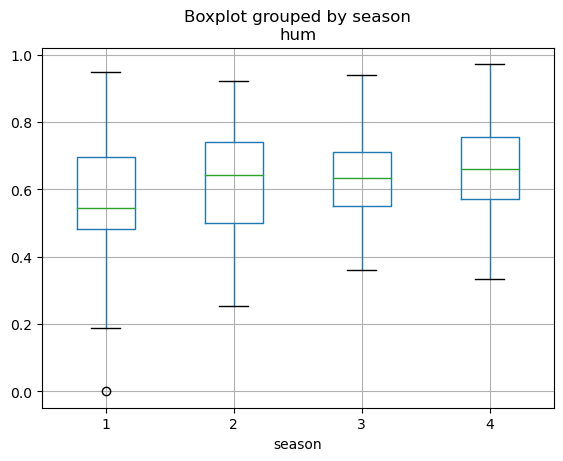

In [49]:
boxplt = df.boxplot('hum', by='season')

In [50]:
hdata = df.groupby('holiday')
hdata.get_group(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2011,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,52,21-02-2011,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,105,15-04-2011,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,150,30-05-2011,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,185,04-07-2011,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
247,248,05-09-2011,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
282,283,10-10-2011,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
314,315,11-11-2011,4,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440,2928,3368
327,328,24-11-2011,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
359,360,26-12-2011,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317


In [51]:
df.groupby('season').apply(lambda x: x['holiday'].count())

season
1    181
2    184
3    188
4    178
dtype: int64

In [52]:
x = df.groupby(['season','holiday'])
x.indices

{(1,
  0): array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78, 354,
        355, 356, 357, 358, 360, 361, 362, 363, 364, 365, 367, 368, 369,
        370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 383,
        384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
        397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
        410, 411, 412, 413, 414, 416, 417, 418, 419, 420, 421, 422, 423,
        424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
        437, 438, 439, 440, 441, 442, 443, 444, 720, 721, 722, 723, 725,
        726, 727, 728, 729, 730], dtype=i

In [53]:
x.get_group((1,1))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2011,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,52,21-02-2011,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
359,360,26-12-2011,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317
366,367,02-01-2012,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
380,381,16-01-2012,1,1,1,1,1,0,1,0.190000,0.190663,0.522500,0.231358,217,2081,2298
415,416,20-02-2012,1,1,2,1,1,0,1,0.280000,0.273391,0.507826,0.229083,502,2627,3129
724,725,25-12-2012,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


In [54]:
z = df.groupby('weathersit')
z.get_group(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,26-01-2011,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,10-03-2011,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,31-03-2011,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,16-04-2011,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,06-09-2011,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,07-09-2011,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,08-09-2011,3,0,9,0,4,1,3,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,12-10-2011,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,19-10-2011,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,29-10-2011,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627


In [55]:
stats.chisquare(df["season"].value_counts())

Power_divergenceResult(statistic=0.29958960328317374, pvalue=0.9601056463738915)

In [56]:
stats.chisquare(df["cnt"].value_counts())

Power_divergenceResult(statistic=31.648426812585505, pvalue=1.0)

In [57]:
contingencyTable = pd.crosstab(df['season'], df['casual'])
print(contingencyTable)
stat, p, dof, expected = stats.chi2_contingency(contingencyTable)
stat, p, dof, expected

casual  2     9     15    25    34    38    41    42    43    46    ...  2846  \
season                                                              ...         
1          0     2     1     1     1     2     1     1     1     1  ...     0   
2          0     0     0     0     0     0     0     0     0     0  ...     1   
3          0     0     0     0     0     0     0     0     0     0  ...     0   
4          1     0     0     0     0     0     0     0     0     0  ...     0   

casual  2855  2963  3031  3065  3155  3160  3252  3283  3410  
season                                                        
1          0     0     0     0     1     0     0     0     0  
2          1     1     0     0     0     0     1     1     1  
3          0     0     0     1     0     1     0     0     0  
4          0     0     1     0     0     0     0     0     0  

[4 rows x 606 columns]


(1916.0185661355936,
 0.048703961255440444,
 1815,
 array([[0.24760602, 0.49521204, 0.24760602, ..., 0.24760602, 0.24760602,
         0.24760602],
        [0.25170999, 0.50341997, 0.25170999, ..., 0.25170999, 0.25170999,
         0.25170999],
        [0.25718194, 0.51436389, 0.25718194, ..., 0.25718194, 0.25718194,
         0.25718194],
        [0.24350205, 0.4870041 , 0.24350205, ..., 0.24350205, 0.24350205,
         0.24350205]]))

In [58]:
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent')
else:
    print('Independent')

Dependent


In [59]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
df['cnt'] = np.log(df['cnt'])

In [61]:
df_oh = df
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','holiday','weekday','workingday','weathersit']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)

In [62]:
df_oh.drop('yr', inplace=True, axis=1)
df_oh.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,01-01-2011,0.344167,0.363625,0.805833,0.160446,331,654,6.892642,0,...,0,0,0,0,0,0,1,0,1,0
1,2,02-01-2011,0.363478,0.353739,0.696087,0.248539,131,670,6.685861,0,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2011,0.196364,0.189405,0.437273,0.248309,120,1229,7.207119,0,...,0,1,0,0,0,0,0,1,0,0
3,4,04-01-2011,0.200000,0.212122,0.590435,0.160296,108,1454,7.353722,0,...,0,0,1,0,0,0,0,1,0,0
4,5,05-01-2011,0.226957,0.229270,0.436957,0.186900,82,1518,7.377759,0,...,0,0,0,1,0,0,0,1,0,0


In [63]:
X = df_oh.drop(columns=['instant', 'dteday', 'atemp', 'windspeed','cnt'], axis=1)
y = df_oh['cnt']

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [65]:
models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [66]:
from sklearn import model_selection

In [67]:
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [68]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.08959146563750368
Model: Ridge()
CV score: 0.0872636334858918
Model: HuberRegressor()
CV score: 0.4769712648167417


Model: ElasticNetCV()
CV score: 0.06441606273218003
Model: DecisionTreeRegressor()
CV score: 0.025283430348108142
Model: RandomForestRegressor()
CV score: 0.01855752192960989
Model: ExtraTreesRegressor()
CV score: 0.017363290695900358
Model: GradientBoostingRegressor()
CV score: 0.01562913619621701


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
model = GradientBoostingRegressor()

In [71]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [72]:
y_pred = model.predict(X_test)

In [73]:
error = y_test - y_pred

In [74]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.22495033984419055